In [36]:
# Setup
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import os
import sys
root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from src.data_loader import DataLoader as DL
from src.coach import train_in_batches

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%%time
dl = DL()
clf_batches = MLPClassifier(hidden_layer_sizes=(128,))
no_steps = 1000
batch_size = 50
results = []
test_x, test_y = dl.load_random_test_data(sample_size=1, return_1d=True)
clf_batches.partial_fit(test_x, test_y, dl.get_classes())

test_x, test_y = dl.load_random_test_data(sample_size=60, return_1d=True)
r = clf_batches.score(test_x, test_y)
results.append(1-r)

for i in range(no_steps):
    data, labels = dl.get_next_training_set(batch_size=batch_size)
    clf_batches.partial_fit(data, labels, dl.classes)
    
    r = clf_batches.score(test_x, test_y)
    results.append(1-r)

# Get random test data
test_x, test_y = dl.load_random_test_data(sample_size=300, return_1d=True)
clf_batches.score(test_x, test_y) 

Count line numbers in file: helicopter.ndjson
Count line numbers in file: octopus.ndjson
Count line numbers in file: pizza.ndjson
Got line number from dict: helicopter.ndjson
Got line number from dict: octopus.ndjson
Got line number from dict: pizza.ndjson


In [39]:
# Save model
pickle.dump(clf_batches, open(dl.model_save_path, 'wb'))

In [40]:
# Score

pred = clf_batches.predict(test_x)

In [41]:
# Confusion Matrix
confusion_matrix(test_y, pred)

array([[261,  24,  15],
       [ 14, 274,  12],
       [ 16,  27, 257]], dtype=int64)

<AxesSubplot:>

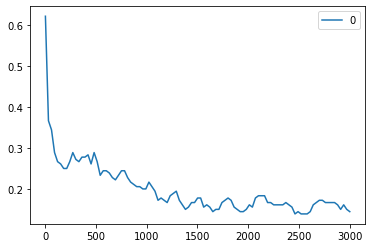

In [55]:
# Plot learning progress
start = 1
step = batch_size
no_steps = no_steps
lin = np.linspace(start, start+(step*no_steps),int((step*no_steps/step)+start))
pd.DataFrame(data=results, index=lin).plot()

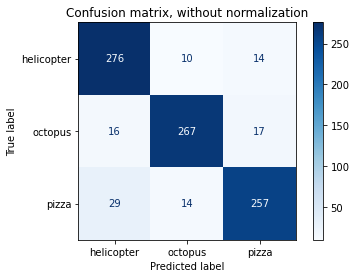

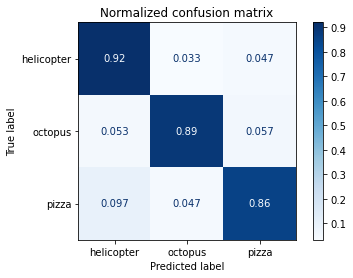

In [30]:
class_names = dl.get_class_names()
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_batches, test_x, test_y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)
    
plt.show()